In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
import re

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [15]:
tpm_d ='~/data/jgiSoy/SMRTsilencing/data/tpm_counts.txt' 
tpm_df = pd.read_csv(tpm_d, sep="\t", header=0, index_col=False)

tpm_df['Luc-ET_media'] = tpm_df.iloc[:,1:4].apply(lambda x: np.log2(x.median()+1), axis=1)
tpm_df['eGFP.m3g3'] = tpm_df.iloc[:,4:7].apply(lambda x: np.log2(x.median()+1), axis=1)
tpm_df['eGFP.m6g1'] = tpm_df.iloc[:,7:10].apply(lambda x: np.log2(x.median()+1), axis=1)

sample_lib_dict = {'NPYCT': 'Luc-ET_1','NPYCU': 'Luc-ET_2','NSNCH': 'Luc-ET_3','NPYCW': 'eGFP.m3g3_8',
                   'NPYCX': 'eGFP.m3g3_9','NPYCZ': 'eGFP.m3g3.v2_6','NPYCY': 'Egfp m6g1-2_10',
                   'NPYGA': 'Egfp m6g1-2.v2_8','NPYGB': 'Egfp m6g1-2.v2_9'}
tpm_df_melt = tpm_df.melt(id_vars='Geneid', value_vars=['NPYCT','NPYCU','NSNCH','NPYCW','NPYCX',
                                                        'NPYCZ','NPYCY','NPYGA','NPYGB'])
tpm_df_melt['sample'] = tpm_df_melt['variable'].map(sample_lib_dict)

In [16]:
InFile='~/data/jgiSoy/SMRTsilencing/data/DGE_summary.txt'

df_deg = pd.read_csv(InFile, sep="\t", header=0, index_col=False,
                    dtype = {'cond_1v2_Sig': str, 'cond_1v3_Sig': str, 'cond_2v3_Sig': str})

#df where both trts are significant
df_de_both = df_deg.loc[(df_deg['cond_1v2_Sig'] == 'TRUE') & \
                        (df_deg['cond_1v3_Sig'] == 'TRUE')]
df_de_both['avg_Lg2FC'] = df_de_both[['cond_1v2_log2FC','cond_1v3_log2FC']].mean(axis=1)
df_de_both.info()

#df only m3g3 is DE
df_de_m3 = df_deg.loc[(df_deg['cond_1v2_Sig'] == 'TRUE') & \
                      (df_deg['cond_1v3_Sig'] == 'FALSE')]

#df only m6g1 is DE
df_de_m6 = df_deg.loc[(df_deg['cond_1v3_Sig'] == 'TRUE') & \
                      (df_deg['cond_1v2_Sig'] == 'FALSE')]

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 45139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geneid           53 non-null     object 
 1   cond_1v2_log2FC  53 non-null     float64
 2   cond_1v2_Padj    53 non-null     object 
 3   cond_1v2_Sig     53 non-null     object 
 4   cond_1v3_log2FC  53 non-null     float64
 5   cond_1v3_Padj    53 non-null     object 
 6   cond_1v3_Sig     53 non-null     object 
 7   cond_2v3_log2FC  53 non-null     float64
 8   cond_2v3_Padj    53 non-null     object 
 9   cond_2v3_Sig     53 non-null     object 
 10  avg_Lg2FC        53 non-null     float64
dtypes: float64(4), object(7)
memory usage: 5.0+ KB


/tmp/ipykernel_4079967/4046150609.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de_both['avg_Lg2FC'] = df_de_both[['cond_1v2_log2FC','cond_1v3_log2FC']].mean(axis=1)


<Axes: xlabel='eGFP.m3g3', ylabel='Luc-ET_media'>

<Axes: xlabel='eGFP.m3g3', ylabel='Luc-ET_media'>

Text(0.5, 0, 'GFP m3g3')

Text(0, 0.5, 'Luc-NT')

<Axes: xlabel='eGFP.m6g1', ylabel='Luc-ET_media'>

<Axes: xlabel='eGFP.m6g1', ylabel='Luc-ET_media'>

Text(0.5, 0, 'GFP m6g1')

Text(0, 0.5, 'Luc-NT')

<Axes: xlabel='eGFP.m3g3', ylabel='eGFP.m6g1'>

<Axes: xlabel='eGFP.m3g3', ylabel='eGFP.m6g1'>

Text(0.5, 0, 'GFP m3g3')

Text(0, 0.5, 'GFP m6g1')

<Axes: ylabel='avg_Lg2FC'>

<Axes: ylabel='avg_Lg2FC'>

<Axes: ylabel='avg_Lg2FC'>

[Text(0.5, 0, 'N=53\nBoth')]

Text(0, 0.5, 'Log2FC')

<Axes: ylabel='cond_1v2_log2FC'>

<Axes: ylabel='cond_1v2_log2FC'>

<Axes: ylabel='cond_1v2_log2FC'>

[Text(0.5, 0, 'N=79\nm3g3')]

[Text(0, 0.5, ' ')]

<Axes: ylabel='cond_1v3_log2FC'>

<Axes: ylabel='cond_1v3_log2FC'>

<Axes: ylabel='cond_1v3_log2FC'>

[Text(0.5, 0, 'N=95\nm6g1')]

[Text(0, 0.5, ' ')]

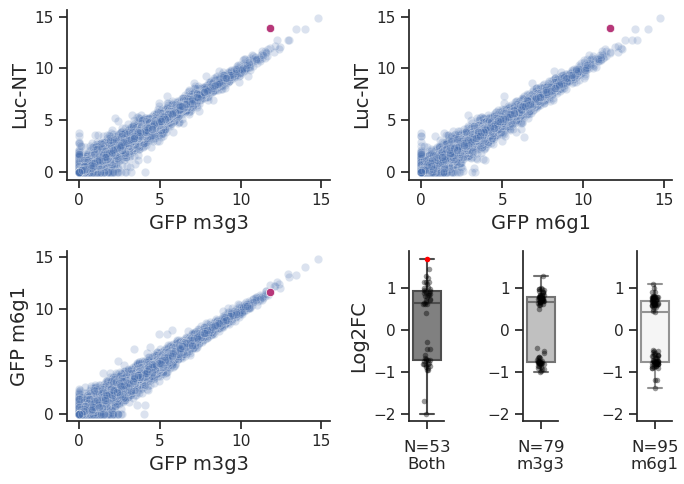

In [17]:
sns.set(style="ticks")
fig = plt.figure(figsize=(7,5))
gs = GridSpec(nrows=2, ncols=6)#, hspace=0.05, wspace=0.5, bottom=0.5)

ax0 = fig.add_subplot(gs[0,:3])
sns.scatterplot(ax=ax0, data = tpm_df, x = "eGFP.m3g3", y = "Luc-ET_media", alpha=0.2)
sns.scatterplot(ax=ax0, data = tpm_df.loc[tpm_df['Geneid'] == 'EGFP'],
                x = "eGFP.m3g3", y = "Luc-ET_media", hue='Geneid', palette="magma",legend=False)
ax0.set_xlabel('GFP m3g3', fontsize=14)
ax0.set_ylabel('Luc-NT', fontsize=14)

ax1 = fig.add_subplot(gs[0,3:])
sns.scatterplot(ax=ax1, data = tpm_df, x = "eGFP.m6g1", y = "Luc-ET_media", alpha=0.2)
sns.scatterplot(ax=ax1, data = tpm_df.loc[tpm_df['Geneid'] == 'EGFP'],
                x = "eGFP.m6g1", y = "Luc-ET_media", hue='Geneid', palette="magma",legend=False)
ax1.set_xlabel('GFP m6g1',fontsize=14)
ax1.set_ylabel('Luc-NT',fontsize=14)

ax2 = fig.add_subplot(gs[1,:3])
sns.scatterplot(ax=ax2, data = tpm_df, x = "eGFP.m3g3", y = "eGFP.m6g1", alpha=0.2)
sns.set_palette("Paired")
sns.scatterplot(ax=ax2, data = tpm_df.loc[tpm_df['Geneid'] == 'EGFP'],
                x = "eGFP.m3g3", y = "eGFP.m6g1", hue='Geneid', palette="magma",legend=False)
ax2.set_xlabel('GFP m3g3',fontsize=14)
ax2.set_ylabel('GFP m6g1',fontsize=14)

ax3 = fig.add_subplot(gs[1,3])
sns.boxplot(ax=ax3, data=df_de_both, y='avg_Lg2FC', color='grey')
sns.stripplot(ax=ax3,data=df_de_both[df_de_both['Geneid'] != 'EGFP'],
              y='avg_Lg2FC', size=4, color="black", linewidth=0, alpha=0.4)
sns.stripplot(ax=ax3,data=df_de_both[df_de_both['Geneid'] == 'EGFP'],
              y='avg_Lg2FC', size=4, color="red", linewidth=0)
ax3.set(xlabel='N=53' + '\n' + 'Both')
ax3.set_ylabel('Log2FC',fontsize=14)

ax4 = fig.add_subplot(gs[1,4], sharey=ax3)
sns.boxplot(ax=ax4, data=df_de_m3, y='cond_1v2_log2FC', color='silver')
sns.stripplot(ax=ax4,data=df_de_m3[df_de_m3['Geneid'] != 'EGFP'],
              y='cond_1v2_log2FC', size=4, color="black", linewidth=0, alpha=0.4)
sns.stripplot(ax=ax4,data=df_de_m3[df_de_m3['Geneid'] == 'EGFP'],
              y='cond_1v2_log2FC', size=4, color="red", linewidth=0)
ax4.set(xlabel='N=79' + '\n' +'m3g3')
ax4.set(ylabel=' ')

ax5 = fig.add_subplot(gs[1,5], sharey=ax3)
sns.boxplot(ax=ax5, data=df_de_m6, y='cond_1v3_log2FC', color='whitesmoke')
sns.stripplot(ax=ax5,data=df_de_m6[df_de_m6['Geneid'] != 'EGFP'],
              y='cond_1v3_log2FC', size=4, color="black", linewidth=0, alpha=0.4)
sns.stripplot(ax=ax5,data=df_de_m6[df_de_m6['Geneid'] == 'EGFP'],
              y='cond_1v3_log2FC', size=4, color="red", linewidth=0)
ax5.set(xlabel='N=95' + '\n' +'m6g1')
ax5.set(ylabel=' ')

sns.despine()
gs.tight_layout(fig)
plt.show()